# Importing the python libraries

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal

# Reading the input brain mri image in grayscale mode

(-0.5, 179.5, 217.5, -0.5)

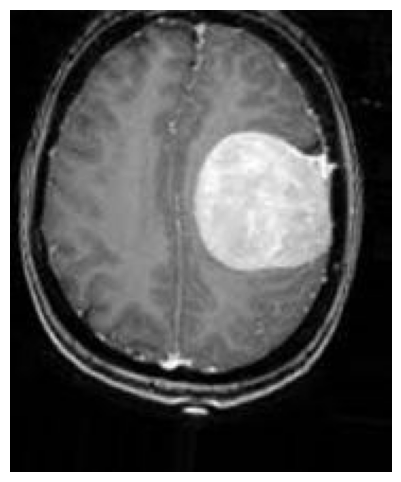

In [51]:
tumor_image = cv2.imread('brain_tumor.jpeg',0)
r,c = tumor_image.shape
plt.figure(figsize = (14,6))
plt.imshow(tumor_image,cmap = 'gray')
plt.axis('off')

# Checking the data type of input mri image

In [52]:
tumor_image.dtype

dtype('uint8')

Grayscaling allows to obtain gray shades of the images between 0(black) to 255(white) for 8bit input mri image.

# Performing morphological operation - dilation and erosion and comparing the results.We have taken a 3x3 structuring element.

Text(0.5, 1.0, 'Erosion Process')

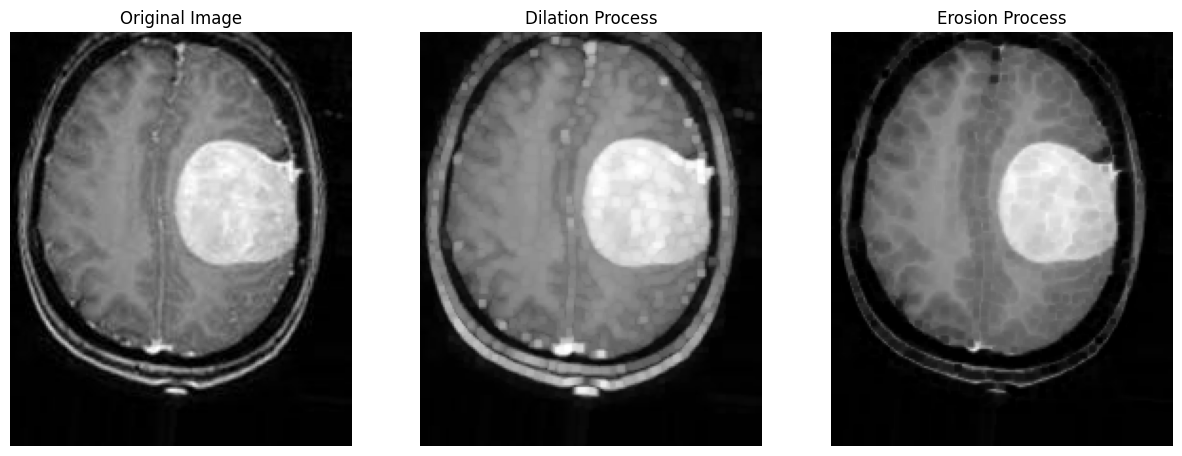

In [53]:
SE1=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
erode = cv2.erode(tumor_image,SE1)
dilate = cv2.dilate(tumor_image,SE1)
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(tumor_image,cmap = 'gray')
plt.title("Original Image")
plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(dilate,cmap = 'gray')
plt.title("Dilation Process")
plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(erode,cmap = 'gray')
plt.title("Erosion Process")


We can conclude that erosion gives best possible results as compared to dilation.We can still see after eroding,the brain tumor
there are some minute noises.

# Median filtering blurs the noise or redundant pixel.

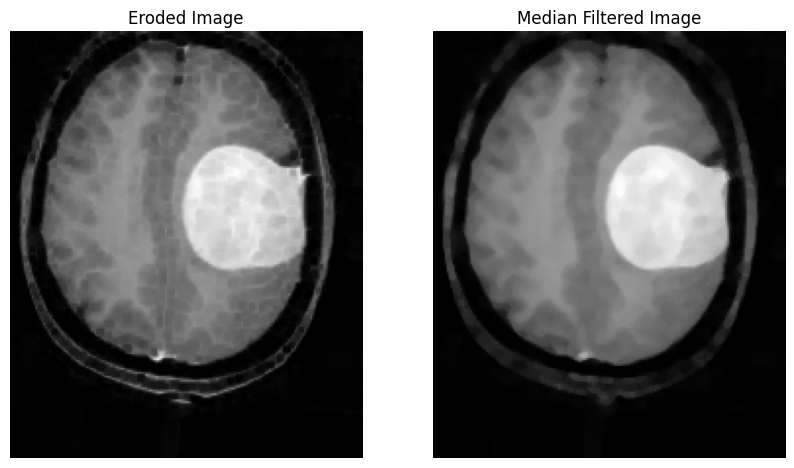

In [54]:
median_blur = cv2.medianBlur(erode,5)
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Eroded Image")
plt.imshow(erode,cmap = 'gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("Median Filtered Image")
plt.imshow(median_blur,cmap = 'gray')


Median Filter can be used if the erosion process of given structuring element size fails to completely removes the noise or redundant pixels.

# Edge Detection Analysis using Canny Edge Detection Method.This is used for detecting tumor regions in input image.

(-0.5, 179.5, 217.5, -0.5)

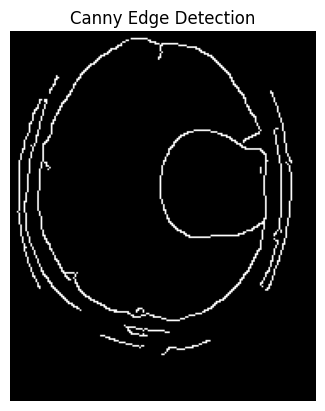

In [55]:
#the second and third parameters of the canny edge detection method can be adjusted to retrieve desired edges.
edges = cv2.Canny(median_blur,200,100)
plt.imshow(edges,cmap = 'gray')
plt.title("Canny Edge Detection")
plt.axis('off')


This method is optional but useful when tumor region is small.The number of Edges in the canny edge detection can be varied 
according to developer's choice to obtain desired edges.

# Thresholding 

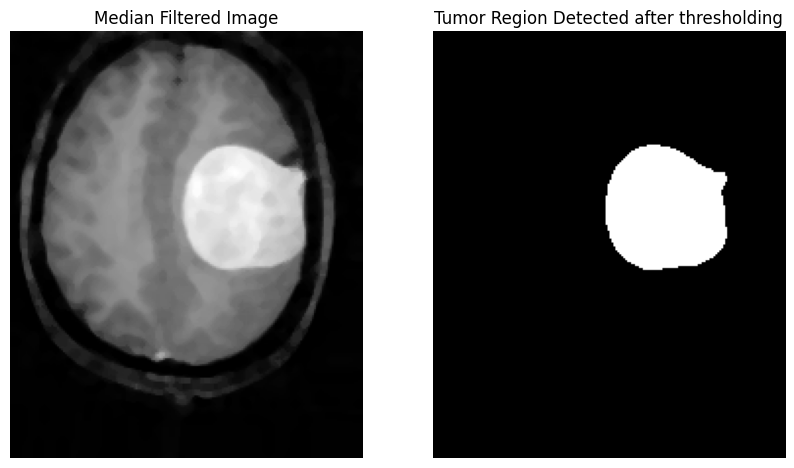

In [57]:
#performing thresholding to highlight tumor region.
T = 160
mblur = median_blur.copy()
#processing
for i in range(r): 
    for j in range(c):
        if mblur[i,j] > T:
            mblur[i,j] = 255
        else:
            mblur[i,j] = 0
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(median_blur,cmap = 'gray')
plt.title("Median Filtered Image")
plt.subplot(1,2,2)
plt.title("Tumor Region Detected after thresholding")
plt.axis('off')
plt.imshow(mblur,cmap = 'gray')

Thresholding is performed to obtain two set of pixels - black and white.This is used for highlighting tumor region.The 
thresholding separates the detection region i.e white region from the background. 

# Calculating area of the detected region.

In [58]:
#calculating the area occupied by the tumor region.
#determination of the number of white pixels.
count_pixels_under_tumor = np.count_nonzero(mblur == 255)
print(f"Area Occupied by tumor region = {count_pixels_under_tumor} pixels")

Area Occupied by tumor region = 3214 pixels


The total count of white pixels is determined to find area under the detected tumor region.This can be useful for classifying
the tumor disease as benign,premalignant or malignant.

# Resizing the image

r,c = mblur.shape
resized = cv2.resize(mblur, (100,100), interpolation = cv2.INTER_CUBIC)
plt.imshow(resized,cmap = 'gray')
plt.title("Resized Image")
plt.axis('off')
plt.show()

Resizing the image gives attention to detail features of the image.Suppose,if the tumor region was very small,then resizing can
help in identifying this small region and then we smoothened the results to obtain better results.

# Dilation - Checking if this morphological operation help us to improve the image results

(-0.5, 179.5, 217.5, -0.5)

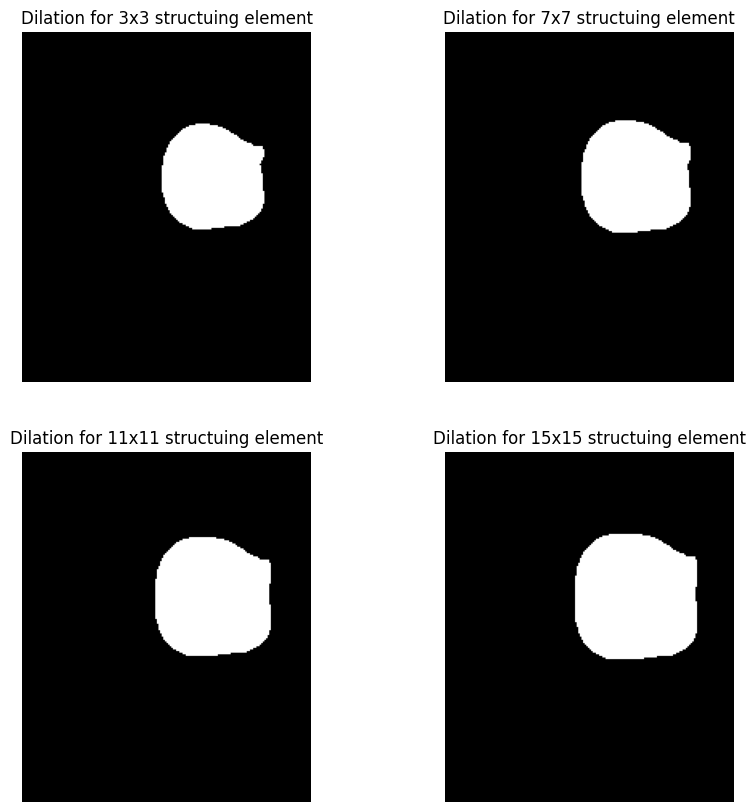

In [71]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
dilate_resized = cv2.dilate(mblur,cv2.getStructuringElement(cv2.MORPH_RECT,(3,3)))
plt.title("Dilation for 3x3 structuing element")
plt.imshow(dilate_resized,cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,2)
dilate_resized = cv2.dilate(mblur,cv2.getStructuringElement(cv2.MORPH_RECT,(7,7)))
plt.title("Dilation for 7x7 structuing element")
plt.imshow(dilate_resized,cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,3)
dilate_resized = cv2.dilate(mblur,cv2.getStructuringElement(cv2.MORPH_RECT,(11,11)))
plt.title("Dilation for 11x11 structuing element")
plt.imshow(dilate_resized,cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,4)
dilate_resized = cv2.dilate(mblur,cv2.getStructuringElement(cv2.MORPH_RECT,(15,15)))
plt.title("Dilation for 15x15 structuing element")
plt.imshow(dilate_resized,cmap = 'gray')
plt.axis('off')


As you can see the dilation increases the size of the tumor region which makes it infeasible while classifying tumor disease.
Also the shape of the tumor region changes as we increase the size of structuring element.So,we propsed a smoothening technique to obtain a smoothened image.

# Smoothening using gaussian blur

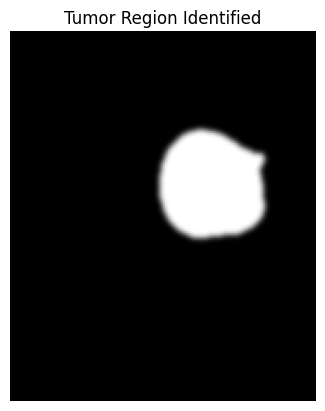

In [74]:
#smothened the resized image
# applying GaussianBlur() function on the resized image to blur the image and displaying it
resultimage = cv2.GaussianBlur(mblur, (9,9), 0)
plt.imshow(resultimage,cmap = 'gray')
plt.axis('off')
plt.title("Tumor Region Identified")
plt.show()


Gaussian filter is a linear type of filter which is based on Gaussian function. In comparison to median filter,a non-linear type of filter which preserves edges while removing noise,gaussian blur doesn't retain the edges but blurs the image to obtain smoothening effect. 